# Hacktiv8 Phase 1: Graded Challenge 3

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Ensemble Learning.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang berisi data pasien yang memiliki penyakit gagal jantung. Dataset ini berisi 299 baris dengan 13 kolom yang diantaranya adalah age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, dan masih banyak lagi. dataset dapat dilihat di [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

Keterangan kolom pada dataset ini adalah:

| Feature                  | Description                                                            |
| ------------------------ | ---------------------------------------------------------------------- |
| age                      | Age                                                                    |
| anaemia                  | Decrease of red blood cells or hemoglobin (boolean)                    |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood (mcg/L)                           |
| diabetes                 | If the patient has diabetes (boolean)                                  |
| ejection_fraction        | Percentage of blood leaving the heart at each contraction (percentage) |
| high_blood_pressure      | If the patient has hypertension (boolean)                              |
| platelets                | Platelets in the blood (kiloplatelets/mL)                              |
| serum_creatinine         | Level of serum creatinine in the blood (mg/dL)                         |
| serum_sodium             | Level of serum sodium in the blood (mEq/L)                             |
| sex                      | Woman or man (binary)                                                  |
| smoking                  | If the patient smokes or not (boolean)                                 |
| time                     | Follow-up period (days)                                                |
| DEATH_EVENT              | If the patient deceased during the follow-up period (boolean)          |

### Objectives

**Graded Challenge 3** ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

- Mampu memahami konsep Classification dengan Ensemble Model.
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import warnings
warnings.filterwarnings("ignore") 

Pada project ini akan library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, dan **XGBoost**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Data Loading

Membuat dataframe bernama `heart` dari file `heart_failure_clinical_records_dataset.csv`.

In [4]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Characteristics

In [6]:
heart.shape

(299, 13)

Dataset ini berisi **299 baris** dengan **13 kolom**.

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari basic info ini dapat diketahui dataframe terbentuk dari:
- 3 kolom bertipe data **float**
- 10 kolom bertipe data **integer**

Dan juga tidak terdapat missing value pada datase.

In [8]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Jika dilihat dari summary statistic diatas sepertinya terdapat anomali pada kolom `creatinine_phosphokinase` dan `platelets` karena nilai minimumnya dan maksimumnya sangat berjauhan dengan quartile 1 dan 3. Maka akan dieksplorasi lebih dalam pada bagian **EDA**.

## Data Cleaning

### Missing Value

In [9]:
heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value pada dataset ini.

### Duplicated Data

In [10]:
heart.duplicated().sum()

0

Pada dataset ini juga tidak terdapat data yang duplikat.

## Exploratory Data Analysis

### DEATH_EVENT (Target Label)

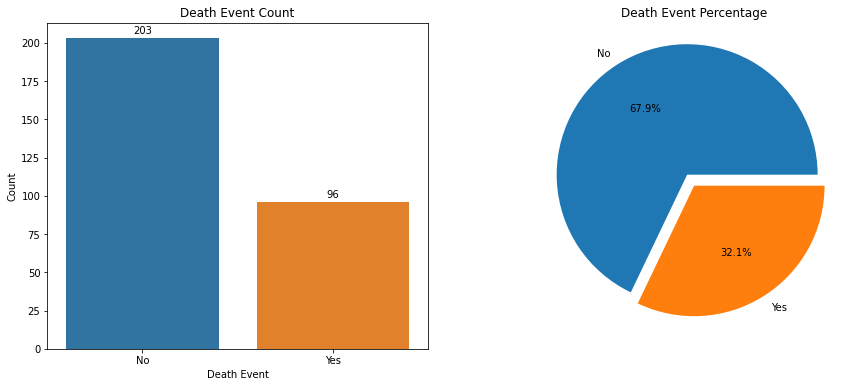

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='DEATH_EVENT', data=heart)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Death Event Count')
fig.set_xticklabels(['No', 'Yes'])
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(heart['DEATH_EVENT'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Death Event Percentage')
plt.show()

Pada dataset ini ada sekitar **32%** atau **96 pasien** yang mengalami kematian akibat gagal jantung.

### Sex

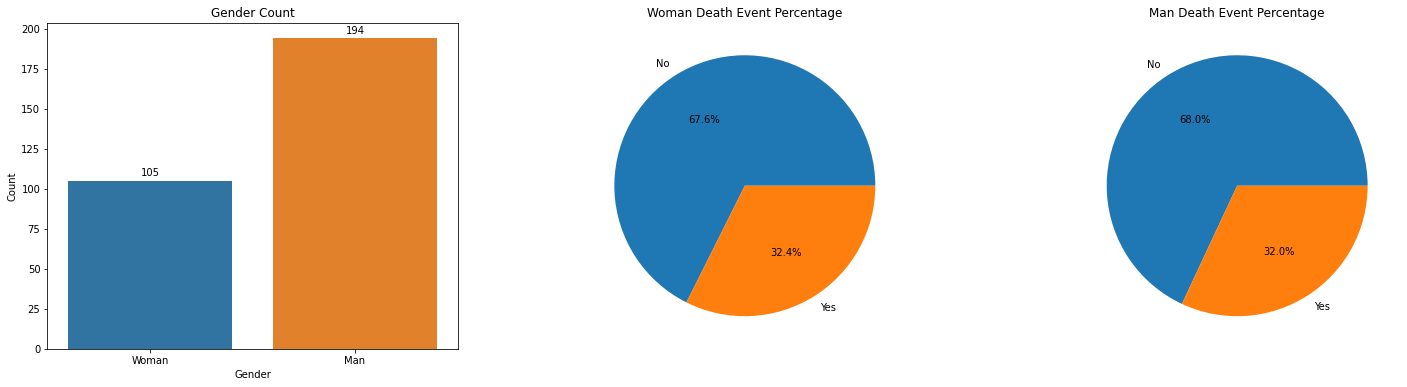

In [12]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='sex', data=heart)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
fig.set_xticklabels(['Woman', 'Man'])
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(heart[heart.sex == 0].DEATH_EVENT.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Woman Death Event Percentage')
plt.subplot(1, 3, 3)
plt.pie(heart[heart.sex == 1].DEATH_EVENT.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Man Death Event Percentage')
plt.show()

Pada dataset ini kebanyakan dari pasien adalah pria dengan jumlah **194 pasien**. Dan jika dilihat dari persentasenya sepertinya kematian akibat gagal jantung ini tidak terperngaruh oleh jenis kelamin karena persentase kematian antara wanita dan pria ini hampir tidak berbeda.

### Age

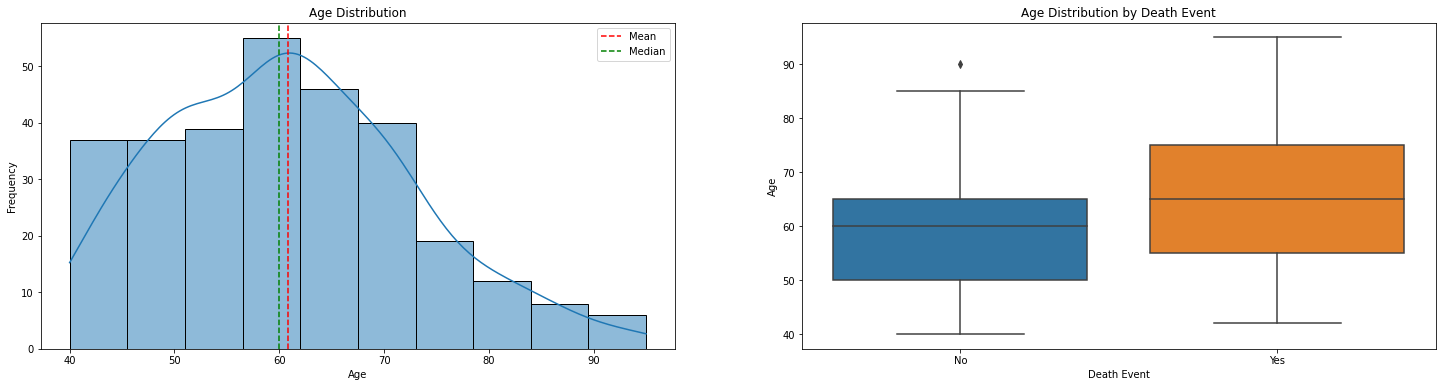

Skewness: 0.42306190672863536
Average Age: 61
Minimum Age: 40.0
Maximum Age: 95.0
Average Age of Patients Who Died: 65
Average Age of Patients Who Survived: 59


In [13]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=heart, kde=True)
plt.axvline(heart.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(heart.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
fig = sns.boxplot(x='DEATH_EVENT', y='age', data=heart)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event')
fig.set_xticklabels(['No', 'Yes'])
plt.ylabel('Age')
plt.show()
print(f'Skewness: {heart.age.skew()}')
print(f'Average Age: {heart.age.mean():.0f}')
print(f'Minimum Age: {heart.age.min()}')
print(f'Maximum Age: {heart.age.max()}')
print(f'Average Age of Patients Who Died: {heart.age[heart.DEATH_EVENT == 1].mean():.0f}')
print(f'Average Age of Patients Who Survived: {heart.age[heart.DEATH_EVENT == 0].mean():.0f}')

Rata-rata usia dari pasien adalah **61 tahun** dengan rata-rata usia pasien yang mengalami kematian akibat gagal jantung adalah sekitar **65 tahun**. Distribusi dari kolom `age` ini masih bisa dikatakan normal karena nilai skewnessnya masih berada diantara -0.5 dan 0.5 namun jika dilihat dari histogramnya distribusi ini sedikit **Right-Skewed**. 

### Anaemia

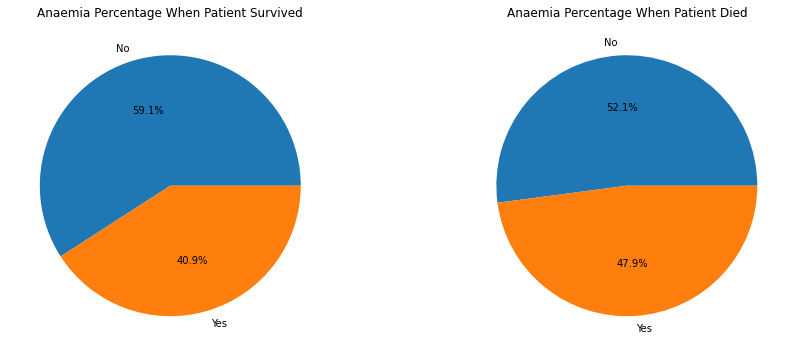

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(heart[heart.DEATH_EVENT == 0].anaemia.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Anaemia Percentage When Patient Survived')
plt.subplot(1, 2, 2)
plt.pie(heart[heart.DEATH_EVENT == 1].anaemia.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Anaemia Percentage When Patient Died')
plt.show()

Jika dilihat dari persentasenya pasien yang mengalami kematian akibat gagal jantung hampir **50%** dari mereka **memiliki penyakit anemia**, sedangkan pasien yang selamat hanya sekitar 40% saja yang memiliki penyakit anemia ini.

### creatinine_phosphokinase

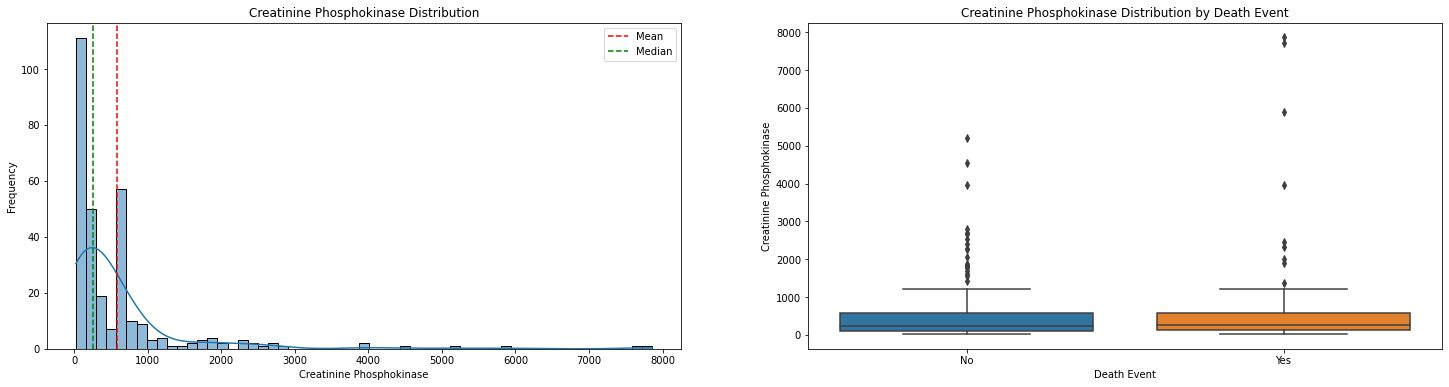

Skewness: 4.463110084653752
Mean: 581.84
Median: 250.00


In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='creatinine_phosphokinase', data=heart, kde=True)
plt.axvline(heart.creatinine_phosphokinase.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(heart.creatinine_phosphokinase.median(), color='g', linestyle='--', label='Median')
plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
fig = sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=heart)
plt.title('Creatinine Phosphokinase Distribution by Death Event')
plt.xlabel('Death Event')
fig.set_xticklabels(['No', 'Yes'])
plt.ylabel('Creatinine Phosphokinase')
plt.show()
print(f'Skewness: {heart.creatinine_phosphokinase.skew()}')
print(f'Mean: {heart.creatinine_phosphokinase.mean():.2f}')
print(f'Median: {heart.creatinine_phosphokinase.median():.2f}')

pada kolom `creatinine_phosphokinase` memiliki distribusi yang **Highly Skewed** ini disebabkan karena terdapat outlier pada kolom ini. Namun, jika dilihat dari box plot sepertinya kadar kreatin kinase ini tidak memiliki hubungan dengan kematian dari pasien, karena kadar kreatin kinase pada pasien yang selamat hampir sama seperti pasien yang tidak selamat.

### Platelets

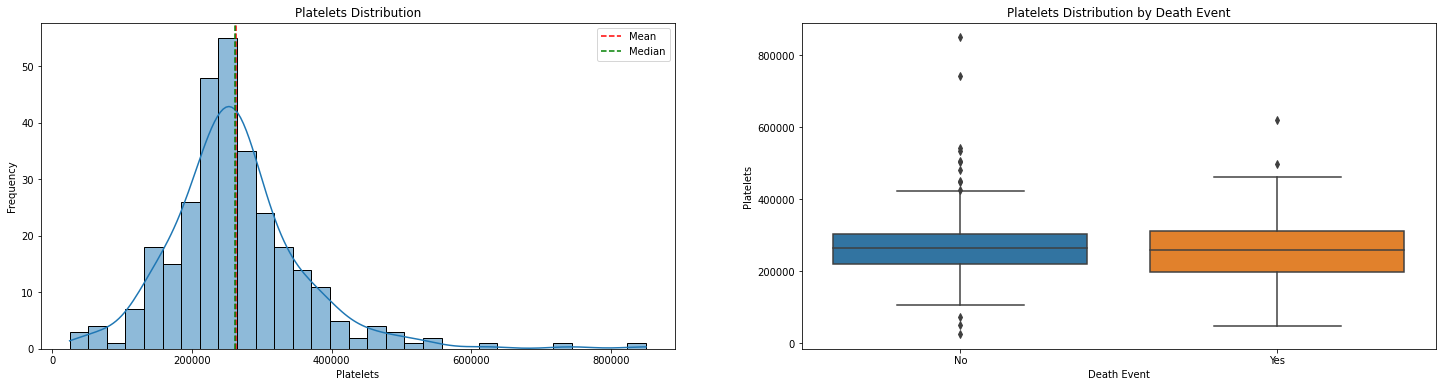

Skewness: 1.4623208382757793
Mean: 263358.03
Median: 262000.00


In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='platelets', data=heart, kde=True)
plt.axvline(heart.platelets.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(heart.platelets.median(), color='g', linestyle='--', label='Median')
plt.title('Platelets Distribution')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
fig = sns.boxplot(x='DEATH_EVENT', y='platelets', data=heart)
plt.title('Platelets Distribution by Death Event')
plt.xlabel('Death Event')
fig.set_xticklabels(['No', 'Yes'])
plt.ylabel('Platelets')
plt.show()
print(f'Skewness: {heart.platelets.skew()}')
print(f'Mean: {heart.platelets.mean():.2f}')
print(f'Median: {heart.platelets.median():.2f}')

Walaupun mean dan median dari kolom `platelets` ini berdekatan tetapi karena terdapat outlier pada kolom ini yang distribusinya menjadi Right-Skewed.

### Time

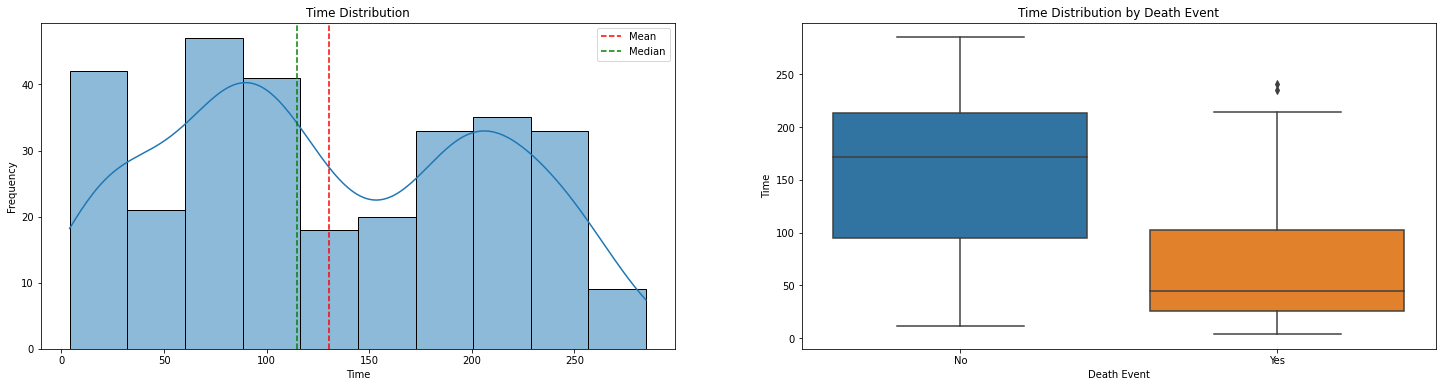

Skewness: 0.12780264559841184
Mean: 130.26
Median: 115.00


In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='time', data=heart, kde=True)
plt.axvline(heart.time.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(heart.time.median(), color='g', linestyle='--', label='Median')
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
fig = sns.boxplot(x='DEATH_EVENT', y='time', data=heart)
plt.title('Time Distribution by Death Event')
plt.xlabel('Death Event')
fig.set_xticklabels(['No', 'Yes'])
plt.ylabel('Time')
plt.show()
print(f'Skewness: {heart.time.skew()}')
print(f'Mean: {heart.time.mean():.2f}')
print(f'Median: {heart.time.median():.2f}')

Dari box plot ini dapat diketahui bahwa kolom `time` ini memiliki hubungan dengan kolom `DEATH_EVENT` karena jumlah waktu perawatan dari pasien yang selamat jauh lebih lama dari pasien yang mengalami gagal jantung.

### Correlation Matrix

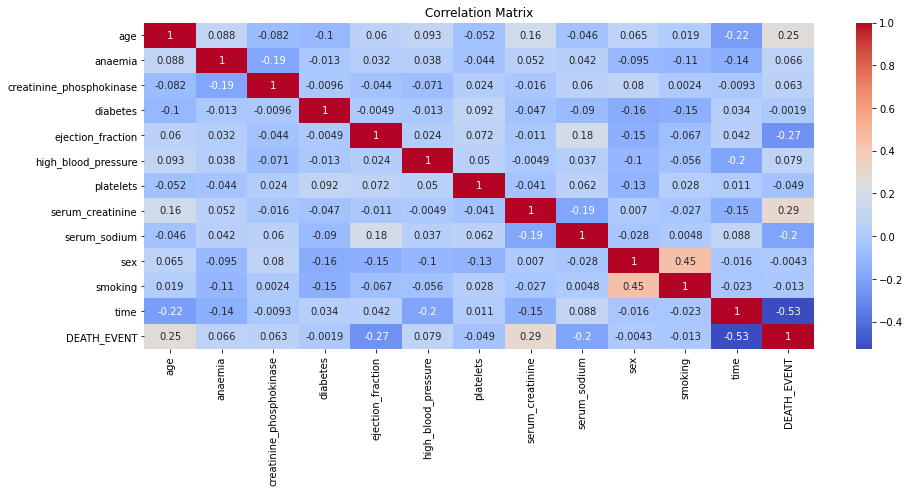

In [18]:
corr = heart.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap diatas dapat diketahui kolom `DEATH_EVENT` berkorelasi dengan kolom `age`, `ejection_fraction`, `serum_creatinine`, `serum_sodium`, dan `time`. Namun karena kolom `age` berkorelasi dengan `time`, `ejection_fraction` dan `serum_creatinine` berkorelasi dengan `serum_sodium`, Maka kolom yang akan digunakan sebagai feature adalah kolom `ejection_fraction`, `serum_creatinine`, `time`, dan `DEATH_EVENT` saja kolom lainnya akan dihapus dari dataframe.

In [19]:
heart = heart[['ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']]

In [20]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ejection_fraction  299 non-null    int64  
 1   serum_creatinine   299 non-null    float64
 2   time               299 non-null    int64  
 3   DEATH_EVENT        299 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


Sekarang dataframe hanya memiliki 4 kolom yang 3 diantaranya akan menjadi features dan `DEATH_EVENT` akan menjadi labelnya.

## Data Preprocessing

### Split Data

Pada bagian ini akan dilakukan **splitting** terhadap dataset untuk dijadikan training, validation, dan testing set. Karena jumlah data yang ada pada dataset ini sedikit maka akan pisah dengan perbandingan **8:1.5:0.5**, dimana:
- **80%** data menjadi training set
- **15%** data menjadi validation set
- **5%** data menjadi testing set

In [21]:
df_train_val, df_test = train_test_split(heart, test_size=0.05, random_state=23, stratify=heart.DEATH_EVENT)
df_train, df_val = train_test_split(df_train_val, test_size=0.15, random_state=23, stratify=df_train_val.DEATH_EVENT)

In [22]:
print(f'df_train proportion: {len(df_train) / len(heart):.2f}')
print(f'df_val proportion: {len(df_val) / len(heart):.2f}')
print(f'df_test proportion: {len(df_test) / len(heart):.2f}')

df_train proportion: 0.81
df_val proportion: 0.14
df_test proportion: 0.05


### Features Selection

Berdasarkan hasil **EDA**, kolom yang akan dijadikan **features** adalah kolom ejection_fraction, serum_creatinine, dan time. Sedangkan kolom `DEATH_EVENT` akan menjadi labelnya.

In [23]:
X_train = df_train.drop(columns='DEATH_EVENT')
y_train = df_train.DEATH_EVENT
X_val = df_val.drop(columns='DEATH_EVENT')
y_val = df_val.DEATH_EVENT

## Model Definition

Pada bagian ini akan dibuat **2 model**, yaitu:

1. `forest` adalah model untuk **Random Forest** dengan hyperparameter sebagai berikut:
   - n_estimators: **300**
   - max_depth: **4**
   - min_samples_leaf: **3**

2. `xgb` adalah model untuk **Extreme Gradient Boosting** dengan hyperparameter sebagai berikut:
   1. n_estimators: **200**
   2. max_depth: **3**
   3. learning_rate: **0.01**

In [24]:
forest = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=3, random_state=23)
xgb = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.01, random_state=23, verbosity=0, silent=True)

## Model Training

Setelah model dibuat, sekarang setiap model akan dilatih dengan menggunakan `X_train` dan `y_train`.

In [25]:
%timeit forest.fit(X_train, y_train)
%timeit xgb.fit(X_train, y_train)

52.9 ms ± 432 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
107 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Model Evaluation

### Random Forest

In [26]:
print('Training Score:', forest.score(X_train, y_train))
print('Validation Score:', forest.score(X_val, y_val))
print('------------------------------------------------------')
print(classification_report(y_val, forest.predict(X_val)))
forest_confusion_matrix = confusion_matrix(y_val, forest.predict(X_val))

Training Score: 0.9045643153526971
Validation Score: 0.9069767441860465
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.86      0.86      0.86        14

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43



### Extreme Gradient Boosting

In [27]:
print('Training Score:', xgb.score(X_train, y_train))
print('Validation Score:', xgb.score(X_val, y_val))
print('------------------------------------------------------')
print(classification_report(y_val, xgb.predict(X_val)))
xgb_confusion_matrix = confusion_matrix(y_val, xgb.predict(X_val))

Training Score: 0.9045643153526971
Validation Score: 0.9069767441860465
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.81      0.93      0.87        14

    accuracy                           0.91        43
   macro avg       0.89      0.91      0.90        43
weighted avg       0.91      0.91      0.91        43



### Confusion Matrix

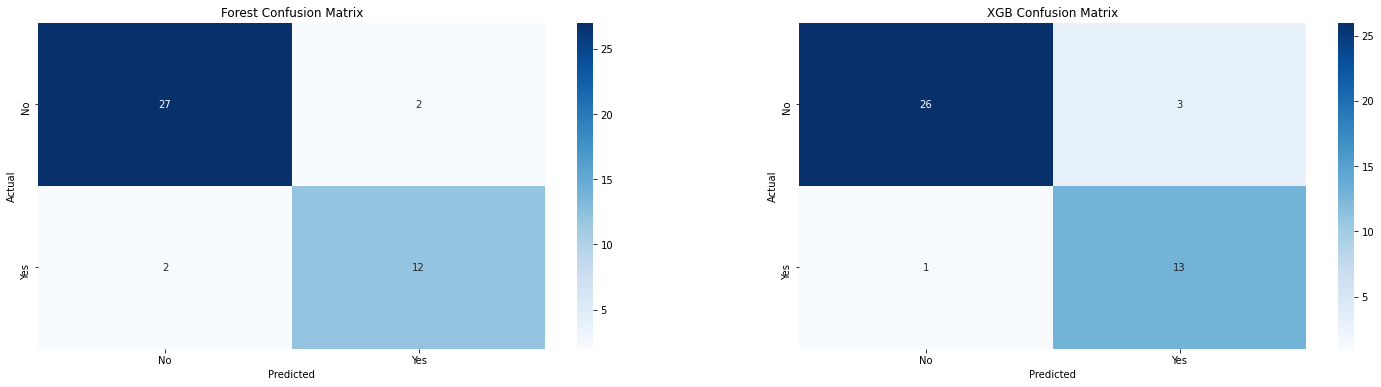

In [28]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
forest_fig = sns.heatmap(forest_confusion_matrix, annot=True, cmap='Blues')
plt.title('Forest Confusion Matrix')
forest_fig.set_xticklabels(['No', 'Yes'])
forest_fig.set_yticklabels(['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
xgb_fig = sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues')
plt.title('XGB Confusion Matrix')
xgb_fig.set_xticklabels(['No', 'Yes'])
xgb_fig.set_yticklabels(['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC-AUC

In [29]:
forest_false_positive_rate_val, forest_true_positive_rate_val, forest_thresholds_val = roc_curve(y_val, forest.predict(X_val))
xgb_false_positive_rate_val, xgb_true_positive_rate_val, xgb_thresholds_val = roc_curve(y_val, xgb.predict(X_val))

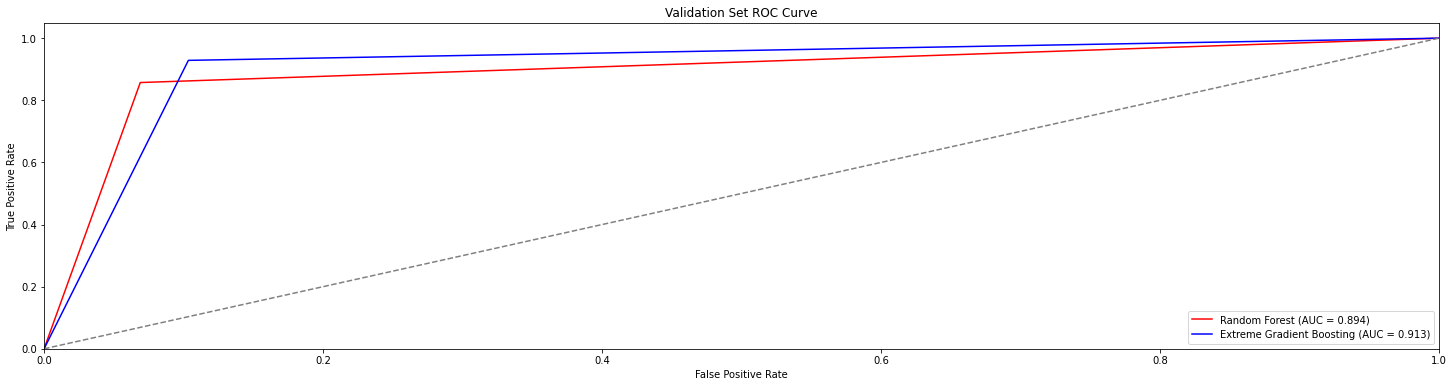

In [30]:
plt.figure(figsize=(25, 6))
plt.plot(forest_false_positive_rate_val, forest_true_positive_rate_val, color='red', label=f'Random Forest (AUC = {roc_auc_score(y_val, forest.predict(X_val)):.3f})')
plt.plot(xgb_false_positive_rate_val, xgb_true_positive_rate_val, color='blue', label=f'Extreme Gradient Boosting (AUC = {roc_auc_score(y_val, xgb.predict(X_val)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()